In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

In [110]:
# Load French inferred dataset
df = pd.read_csv('openbook_qa_fr_inferred.csv')


In [111]:
# Helper: univariate correlation table
def corr_table(df, predictors, targets):
    rows = []
    for p in predictors:
        for t in targets:
            r, pval = pearsonr(df[p], df[t])
            rows.append({'predictor': p, 'target': t, 'r': r, 'p_value': pval})
    return pd.DataFrame(rows)


In [112]:
# Section A: MCQ Response Time vs Complexity

In [113]:

# A1: Scatter plots: answer times vs combined complexity
def plot_scatter(df, x, y):
    """
    Scatter-plot of llama_prompt_eval_time_s vs. combined_complexity,
    with a linear best-fit line.
    """
    df_x = df[x]
    df_y = df[y]

    # Scatter
    plt.figure(figsize=(6,4))
    plt.scatter(df_x, df_y, alpha=0.6, edgecolor='k')

    # Best-fit line
    m, b = np.polyfit(df_x, df_y, 1)
    x_line = np.linspace(df_x.min(), df_x.max(), 100)
    plt.plot(x_line, m * x_line + b, color='red', lw=2)

    # Labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.legend()
    plt.show()




<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


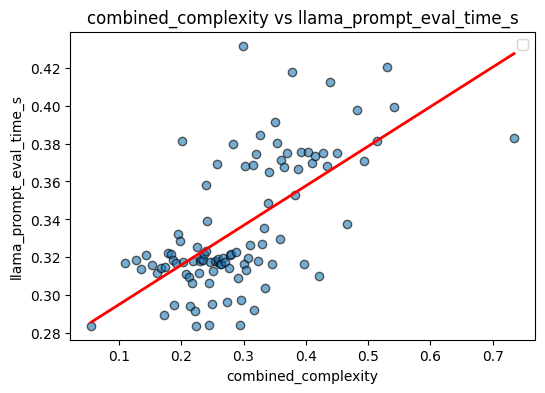

In [114]:
x = 'combined_complexity'
y = 'llama_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


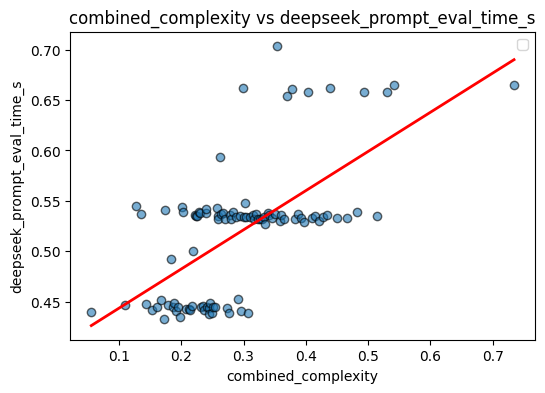

In [115]:
x = 'combined_complexity'
y = 'deepseek_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


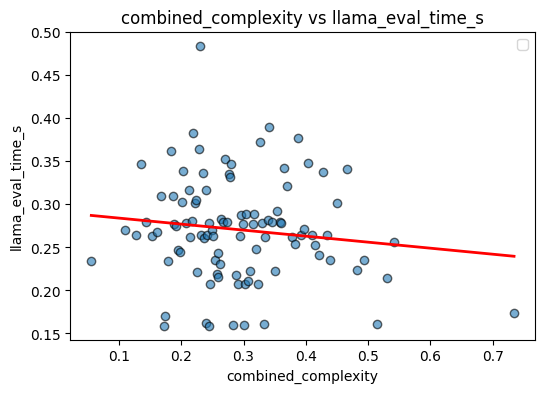

In [116]:
x = 'combined_complexity'
y = 'llama_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


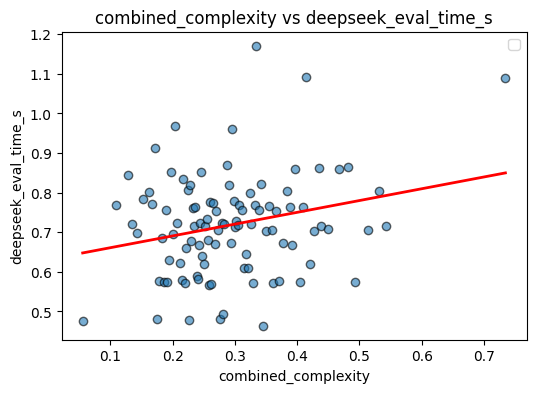

In [117]:
x = 'combined_complexity'
y = 'deepseek_eval_time_s'
plot_scatter(df, x, y)

We discard eval times

In [118]:
mcq_times = [
    'llama_prompt_eval_time_s',
    'deepseek_prompt_eval_time_s'
]
complexity_metrics = [
    'semantic_norm', 'grammatical_norm',
    'syntactic_norm', 'combined_complexity'
]

In [119]:
# A2: Univariate correlations
uni_corr = corr_table(df, complexity_metrics, mcq_times)
print("A2 – Univariate correlations:\n", uni_corr)

A2 – Univariate correlations:
              predictor                       target         r       p_value
0        semantic_norm     llama_prompt_eval_time_s  0.622605  4.654152e-12
1        semantic_norm  deepseek_prompt_eval_time_s  0.625664  3.409458e-12
2     grammatical_norm     llama_prompt_eval_time_s  0.599628  4.340751e-11
3     grammatical_norm  deepseek_prompt_eval_time_s  0.557794  1.652717e-09
4       syntactic_norm     llama_prompt_eval_time_s  0.302839  2.194475e-03
5       syntactic_norm  deepseek_prompt_eval_time_s  0.367010  1.727115e-04
6  combined_complexity     llama_prompt_eval_time_s  0.643702  5.067578e-13
7  combined_complexity  deepseek_prompt_eval_time_s  0.636566  1.093468e-12


In [120]:
# A3: Human-Judgment effects
hj_corr = corr_table(df, ['humanScore_norm', 'clarity_norm'], mcq_times)
print("A3 – Human-judgment correlations:\n", hj_corr)

A3 – Human-judgment correlations:
          predictor                       target         r   p_value
0  humanScore_norm     llama_prompt_eval_time_s -0.054682  0.588956
1  humanScore_norm  deepseek_prompt_eval_time_s -0.075560  0.454963
2     clarity_norm     llama_prompt_eval_time_s  0.167116  0.096541
3     clarity_norm  deepseek_prompt_eval_time_s  0.077907  0.441032


In [121]:
# Section B: Fact Response Time vs Complexity


In [122]:
# B1: Scatter plots: fact times vs combined complexity

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


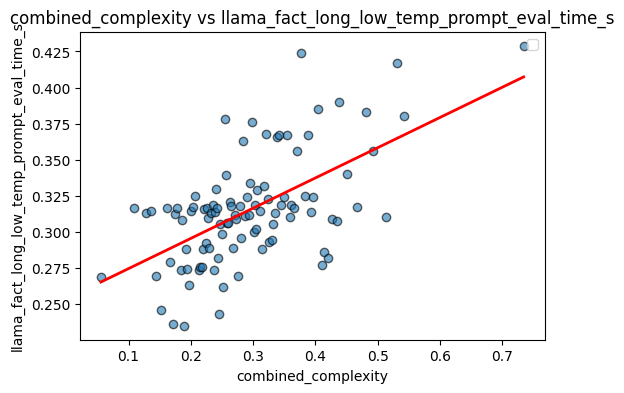

In [123]:
x = 'combined_complexity'
y = 'llama_fact_long_low_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


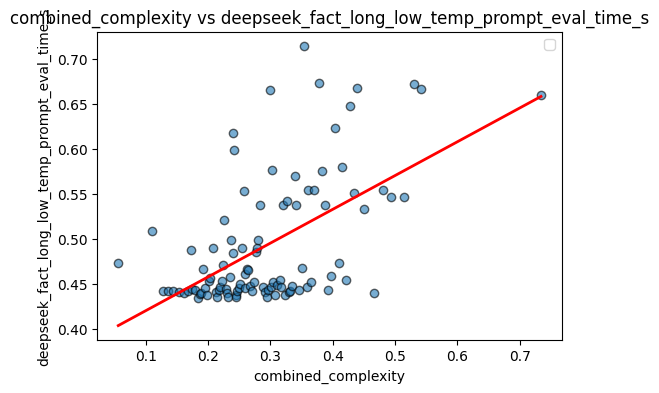

In [124]:
x = 'combined_complexity'
y = 'deepseek_fact_long_low_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


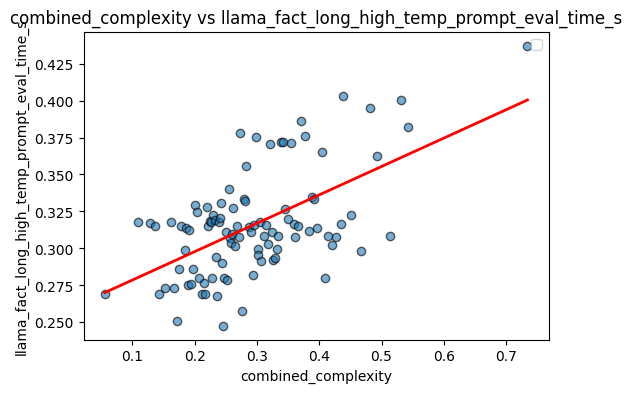

In [125]:
x = 'combined_complexity'
y = 'llama_fact_long_high_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


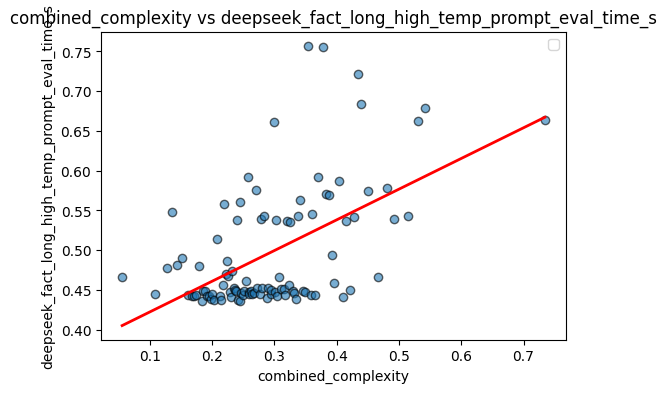

In [126]:
x = 'combined_complexity'
y = 'deepseek_fact_long_high_temp_prompt_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


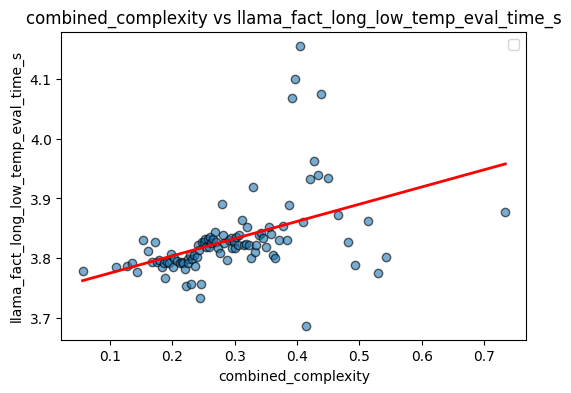

In [127]:
x = 'combined_complexity'
y = 'llama_fact_long_low_temp_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


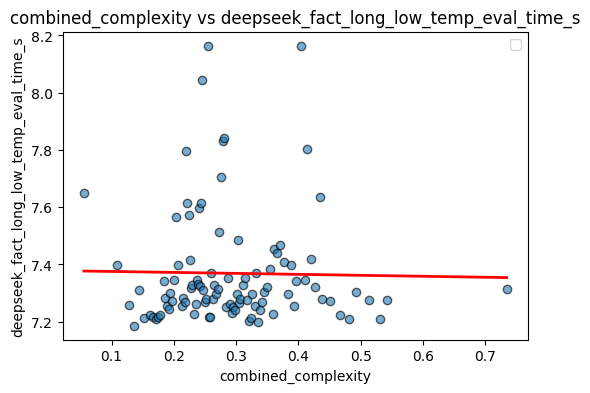

In [128]:
x = 'combined_complexity'
y = 'deepseek_fact_long_low_temp_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


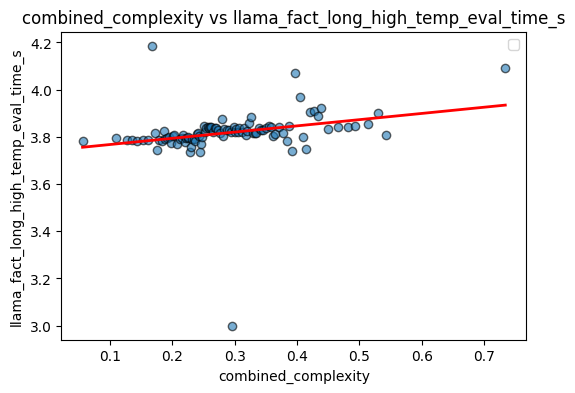

In [129]:
x = 'combined_complexity'
y = 'llama_fact_long_high_temp_eval_time_s'
plot_scatter(df, x, y)

<ipython-input-113-4755ebee074c>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


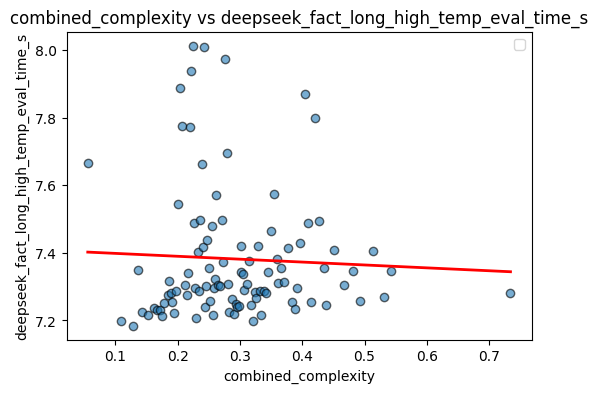

In [130]:
x = 'combined_complexity'
y = 'deepseek_fact_long_high_temp_eval_time_s'
plot_scatter(df, x, y)

In [131]:
fact_times = [
    'llama_fact_long_low_temp_prompt_eval_time_s',
    'deepseek_fact_long_low_temp_prompt_eval_time_s',
    'llama_fact_long_high_temp_prompt_eval_time_s',
    'deepseek_fact_long_high_temp_prompt_eval_time_s'
]

In [132]:
# B2: Univariate correlations
fact_corr = corr_table(df, complexity_metrics, fact_times)
print("B2 – Fact univariate correlations:\n", fact_corr)

B2 – Fact univariate correlations:
               predictor                                           target  \
0         semantic_norm      llama_fact_long_low_temp_prompt_eval_time_s   
1         semantic_norm   deepseek_fact_long_low_temp_prompt_eval_time_s   
2         semantic_norm     llama_fact_long_high_temp_prompt_eval_time_s   
3         semantic_norm  deepseek_fact_long_high_temp_prompt_eval_time_s   
4      grammatical_norm      llama_fact_long_low_temp_prompt_eval_time_s   
5      grammatical_norm   deepseek_fact_long_low_temp_prompt_eval_time_s   
6      grammatical_norm     llama_fact_long_high_temp_prompt_eval_time_s   
7      grammatical_norm  deepseek_fact_long_high_temp_prompt_eval_time_s   
8        syntactic_norm      llama_fact_long_low_temp_prompt_eval_time_s   
9        syntactic_norm   deepseek_fact_long_low_temp_prompt_eval_time_s   
10       syntactic_norm     llama_fact_long_high_temp_prompt_eval_time_s   
11       syntactic_norm  deepseek_fact_long_high_tem

We discard eval_time entries

In [133]:
# Section C: Model-to-Model Comparisons
df['delta_prompt_time'] = df['deepseek_prompt_eval_time_s'] - df['llama_prompt_eval_time_s']
deltas_corr = corr_table(df, complexity_metrics, ['delta_prompt_time'])
print("C1 – Δtime correlations:\n", deltas_corr)

C1 – Δtime correlations:
              predictor             target         r   p_value
0        semantic_norm  delta_prompt_time  0.394764  0.000048
1     grammatical_norm  delta_prompt_time  0.320187  0.001164
2       syntactic_norm  delta_prompt_time  0.276014  0.005442
3  combined_complexity  delta_prompt_time  0.394339  0.000049


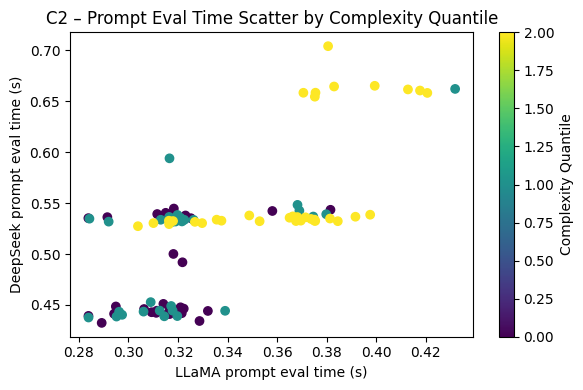

In [134]:
# C2: Scatter llama vs deepseek prompt eval times withing their combined complexity ranges
df['complexity_quantile'] = pd.qcut(df['combined_complexity'], 3, labels=False)
plt.figure(figsize=(6,4))
plt.scatter(df['llama_prompt_eval_time_s'], df['deepseek_prompt_eval_time_s'], c=df['complexity_quantile'], cmap='viridis')
plt.xlabel('LLaMA prompt eval time (s)')
plt.ylabel('DeepSeek prompt eval time (s)')
plt.title('C2 – Prompt Eval Time Scatter by Complexity Quantile')
plt.colorbar(label='Complexity Quantile')
plt.tight_layout()
plt.show()

In [135]:
# Section D: Accuracy vs Complexity
def logistic_summary(df, predictor, target):
    model = LogisticRegression()
    X = df[[predictor]].values
    y = df[target].values
    model.fit(X, y)
    y_score = model.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    return model.coef_[0][0], roc_auc


In [136]:
acc_results = []
for metric in complexity_metrics:
    coef, roc_auc = logistic_summary(df, metric, 'is_validated')
    acc_results.append({'metric': metric, 'coef': coef, 'auc': roc_auc})
acc_df = pd.DataFrame(acc_results)
print("D1 – Overall validation vs complexity:\n", acc_df)

D1 – Overall validation vs complexity:
                 metric      coef       auc
0        semantic_norm  0.607652  0.591293
1     grammatical_norm  0.405462  0.544834
2       syntactic_norm -0.084844  0.466537
3  combined_complexity  0.477540  0.610136


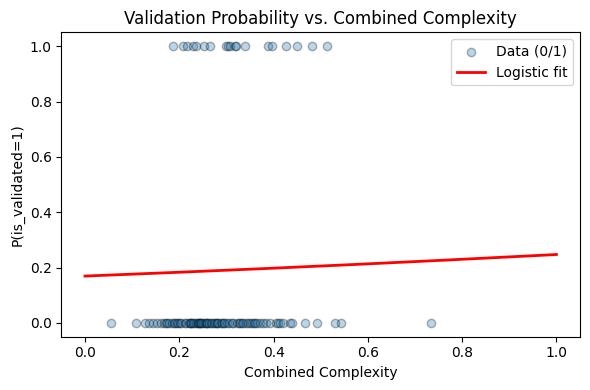

In [137]:
X = df['combined_complexity'].values.reshape(-1,1)
y = df['is_validated'].values

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

x_vals = np.linspace(0, 1, 200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(6,4))
# scatter actual 0/1
plt.scatter(X, y, alpha=0.3, label='Data (0/1)', edgecolor='k')
# logistic curve
plt.plot(x_vals, y_prob, color='red', lw=2, label='Logistic fit')
plt.xlabel('Combined Complexity')
plt.ylabel('P(is_validated=1)')
plt.title('Validation Probability vs. Combined Complexity')
plt.legend()
plt.tight_layout()
plt.show()

In [138]:
# Per-model validation
for mod in ['llama', 'deepseek']:
    res = []
    for metric in complexity_metrics:
        coef, roc_auc = logistic_summary(df, metric, f'is_validated_{mod}')
        res.append({'metric': metric, 'coef': coef, 'auc': roc_auc})
    print(f"D2 – {mod.capitalize()} validation vs complexity:\n", pd.DataFrame(res))
    print()

D2 – Llama validation vs complexity:
                 metric      coef       auc
0        semantic_norm  0.702429  0.553535
1     grammatical_norm  0.447733  0.532727
2       syntactic_norm  0.466816  0.550707
3  combined_complexity  0.813964  0.593131

D2 – Deepseek validation vs complexity:
                 metric      coef       auc
0        semantic_norm  0.110554  0.514706
1     grammatical_norm  0.677063  0.568405
2       syntactic_norm -0.128399  0.507130
3  combined_complexity  0.226320  0.540107



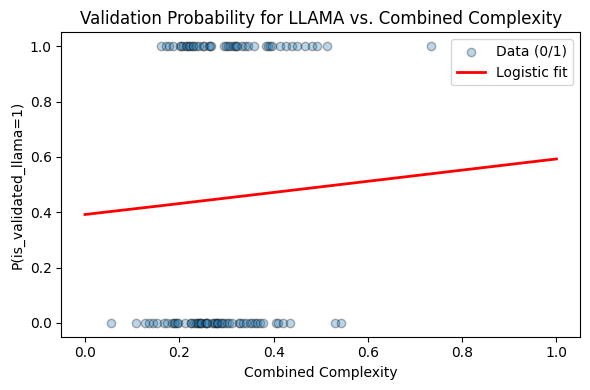

In [139]:
X = df['combined_complexity'].values.reshape(-1,1)
y = df['is_validated_llama'].values

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

x_vals = np.linspace(0, 1, 200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(6,4))
# scatter actual 0/1
plt.scatter(X, y, alpha=0.3, label='Data (0/1)', edgecolor='k')
# logistic curve
plt.plot(x_vals, y_prob, color='red', lw=2, label='Logistic fit')
plt.xlabel('Combined Complexity')
plt.ylabel('P(is_validated_llama=1)')
plt.title('Validation Probability for LLAMA vs. Combined Complexity')
plt.legend()
plt.tight_layout()
plt.show()

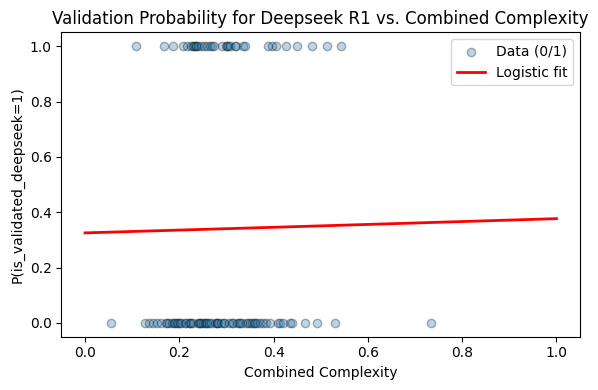

In [140]:
X = df['combined_complexity'].values.reshape(-1,1)
y = df['is_validated_deepseek'].values

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

x_vals = np.linspace(0, 1, 200).reshape(-1,1)
y_prob = model.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(6,4))
# scatter actual 0/1
plt.scatter(X, y, alpha=0.3, label='Data (0/1)', edgecolor='k')
# logistic curve
plt.plot(x_vals, y_prob, color='red', lw=2, label='Logistic fit')
plt.xlabel('Combined Complexity')
plt.ylabel('P(is_validated_deepseek=1)')
plt.title('Validation Probability for Deepseek R1 vs. Combined Complexity')
plt.legend()
plt.tight_layout()
plt.show()

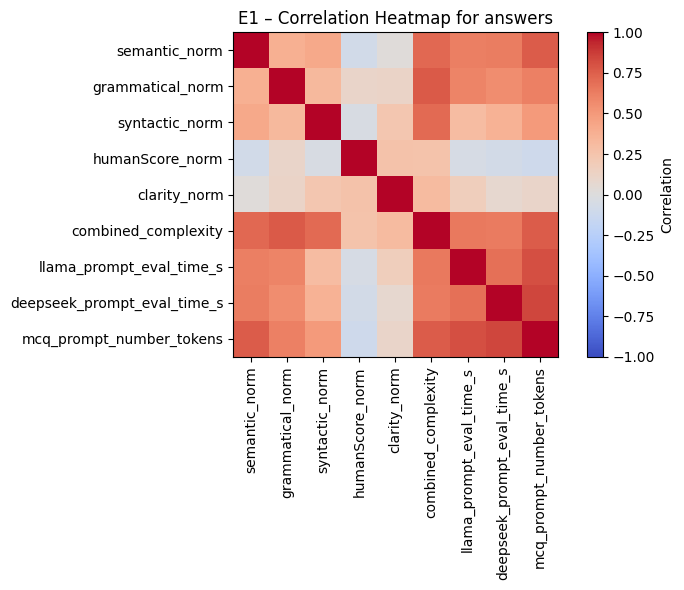

In [141]:
# Section E: Complexity Component Interactions for answers and number of tokens
all_feats = [
    'semantic_norm', 'grammatical_norm', 'syntactic_norm',
    'humanScore_norm', 'clarity_norm', 'combined_complexity'
] + mcq_times + ['mcq_prompt_number_tokens']
corr_mat = df[all_feats].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(all_feats)), all_feats, rotation=90)
plt.yticks(range(len(all_feats)), all_feats)
plt.title('E1 – Correlation Heatmap for answers')
plt.tight_layout()
plt.show()


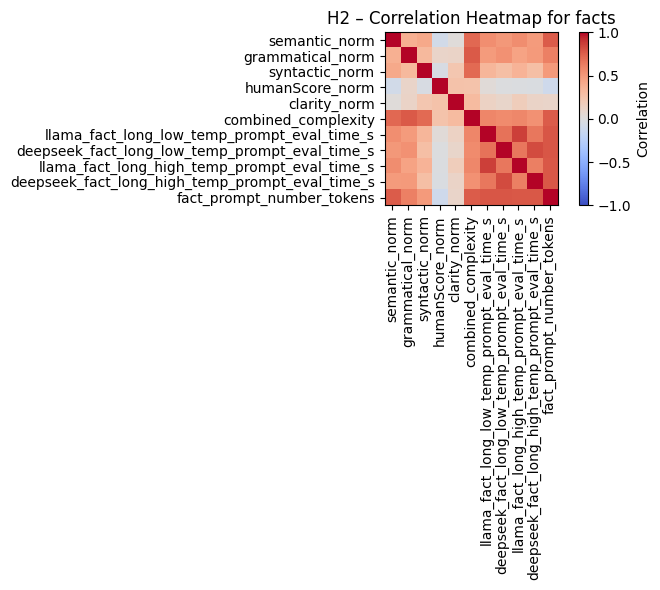

In [142]:
all_feats = [
    'semantic_norm', 'grammatical_norm', 'syntactic_norm',
    'humanScore_norm', 'clarity_norm', 'combined_complexity'
] + fact_times + ['fact_prompt_number_tokens']
corr_mat = df[all_feats].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(all_feats)), all_feats, rotation=90)
plt.yticks(range(len(all_feats)), all_feats)
plt.title('H2 – Correlation Heatmap for facts')
plt.tight_layout()
plt.show()


In [143]:
# Section F: Bucketed & Quantile Analyses
df['complexity_decile'] = pd.qcut(df['combined_complexity'], 10, labels=False)
decile_stats = df.groupby('complexity_decile')[mcq_times].agg(['mean','std'])
print("F1 – Decile MCQ times:\n", decile_stats)


F1 – Decile MCQ times:
                   llama_prompt_eval_time_s            \
                                      mean       std   
complexity_decile                                      
0                                 0.309919  0.012660   
1                                 0.324482  0.022471   
2                                 0.307706  0.013673   
3                                 0.317506  0.020919   
4                                 0.320421  0.018371   
5                                 0.335207  0.044768   
6                                 0.335935  0.030077   
7                                 0.355023  0.029299   
8                                 0.363275  0.031067   
9                                 0.384618  0.024188   

                  deepseek_prompt_eval_time_s            
                                         mean       std  
complexity_decile                                        
0                                    0.472430  0.047461  
1              

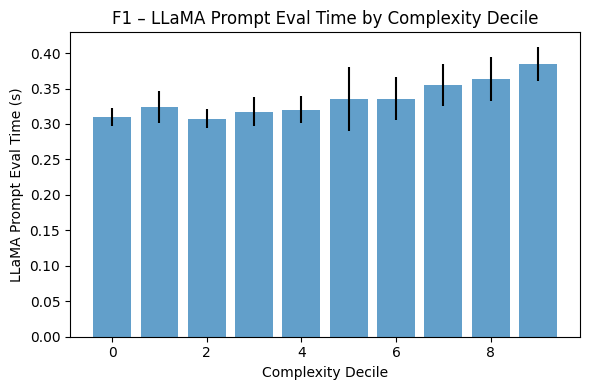

In [144]:

# Bar chart for llama_eval_time_s by decile
plt.figure(figsize=(6,4))
means = decile_stats['llama_prompt_eval_time_s']['mean']
stds  = decile_stats['llama_prompt_eval_time_s']['std']
plt.bar(range(10), means, yerr=stds, alpha=0.7)
plt.xlabel('Complexity Decile')
plt.ylabel('LLaMA Prompt Eval Time (s)')
plt.title('F1 – LLaMA Prompt Eval Time by Complexity Decile')
plt.tight_layout()
plt.show()


In [145]:
df['complexity_decile'] = pd.qcut(df['combined_complexity'], 10, labels=False)
decile_stats = df.groupby('complexity_decile')[fact_times].agg(['mean','std'])
print("F2 – Decile Fact times:\n", decile_stats)


F2 – Decile Fact times:
                   llama_fact_long_low_temp_prompt_eval_time_s            \
                                                         mean       std   
complexity_decile                                                         
0                                                    0.287271  0.031287   
1                                                    0.291649  0.029417   
2                                                    0.294902  0.017401   
3                                                    0.294473  0.028133   
4                                                    0.314910  0.028933   
5                                                    0.325185  0.025963   
6                                                    0.314963  0.024070   
7                                                    0.335723  0.024682   
8                                                    0.329327  0.048397   
9                                                    0.362962  0.043698   
